In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
df=pd.read_csv('UBS.csv')

In [4]:
len(df)

798

In [55]:
df[791:798]

,Close
Date,
2023-02-23,21.629999
2023-02-24,21.410000
2023-02-27,21.730000
2023-02-28,21.780001
2023-03-01,21.610001
2023-03-02,21.459999
2023-03-03,22.120001


In [8]:
df = pd.read_csv('UBS.csv',index_col='Date',parse_dates=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
train=df[:791]
test=df[791:]
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [57]:
n_input=7
n_features=1

In [28]:
790-6

784

In [48]:
train[784:]

,Close
Date,


In [58]:
train_generator=TimeseriesGenerator(scaled_train,
                                     scaled_train,
                                      n_input,
                                      batch_size=1)

In [86]:
X,y = train_generator[0]

In [87]:
X

array([[[0.36470587],
        [0.350173  ],
        [0.34809689],
        [0.36608992],
        [0.37785463],
        [0.37993081],
        [0.36885809]]])

In [88]:
y

array([[0.37647058]])

In [59]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(1))

In [60]:
model.compile(optimizer='adam',loss='mse')


In [61]:
model.fit(train_generator,epochs=10)


Epoch 1/10
784/784 [==============================] - 6s 4ms/step - loss: 0.0115
Epoch 2/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0031
Epoch 3/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0034
Epoch 4/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0025
Epoch 5/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0024
Epoch 6/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0022
Epoch 7/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0017
Epoch 8/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 9/10
784/784 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 10/10
784/784 [==============================] - 4s 4ms/step - loss: 0.0012


In [81]:
current_batch

array([[[0.95522982],
        [0.94801223],
        [0.94392484],
        [0.94224888],
        [0.94107878],
        [0.94135493],
        [0.94233698]]])

In [80]:
current_batch[:,1:,:]

array([[[0.94801223],
        [0.94392484],
        [0.94224888],
        [0.94107878],
        [0.94135493],
        [0.94233698]]])

In [62]:
test_predictions = []
#Last n_input from the train data
first_eval_batch = scaled_train[-n_input:]

#reshape the data into LSTM required (#batch,#timesteps,#features)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # get prediction
    current_pred = model.predict(current_batch)[0]
    pred = model.predict(current_batch)[0]
    # Add this prediction to the list
    test_predictions.append(pred)

    # current_batch[:        ,1:   ,:]
    # 1: -> just to skip 1st value
    current_batch = np.append(current_batch[:,1:,:],
                              [[current_pred]],
                              axis=1)

1/1 [==============================] - 0s 14ms/step


In [63]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[21.45307125],
       [21.34877713],
       [21.28971437],
       [21.26549669],
       [21.24858877],
       [21.25257911],
       [21.26676968]])

In [37]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[21.70385134],
       [21.68660499],
       [21.77590346],
       [21.79697023],
       [21.8628956 ],
       [21.89583567],
       [21.95173347],
       [21.99094768],
       [22.0419816 ],
       [22.08472146],
       [22.13336866],
       [22.17789395],
       [22.22537375],
       [22.27079008]])

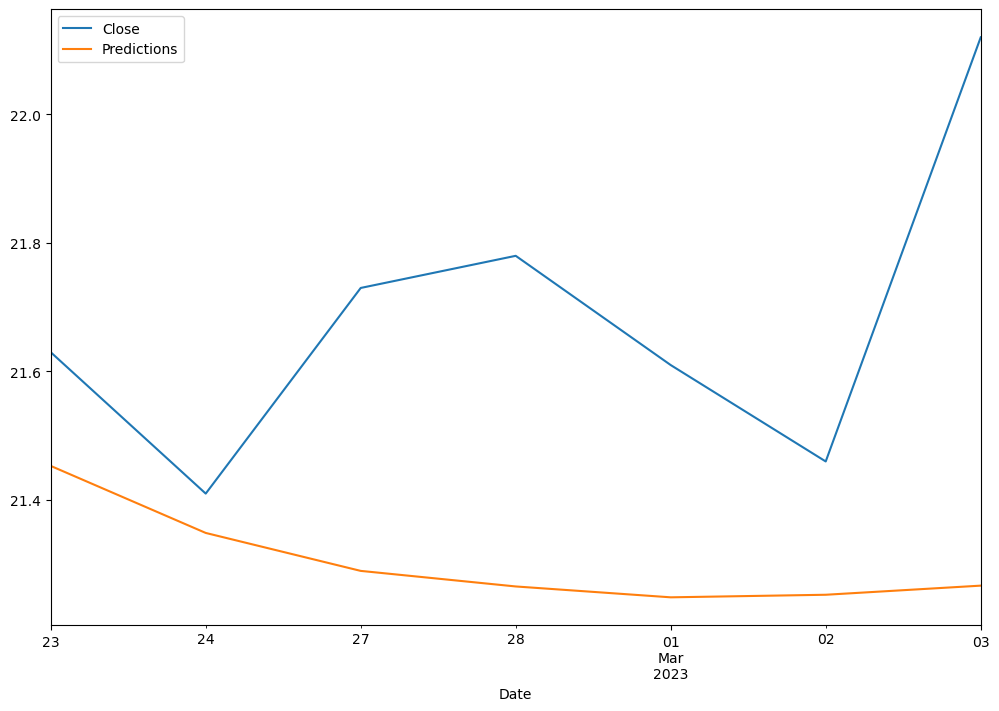

In [64]:
test['Predictions'] = actual_predictions
test.plot(figsize=(12,8));

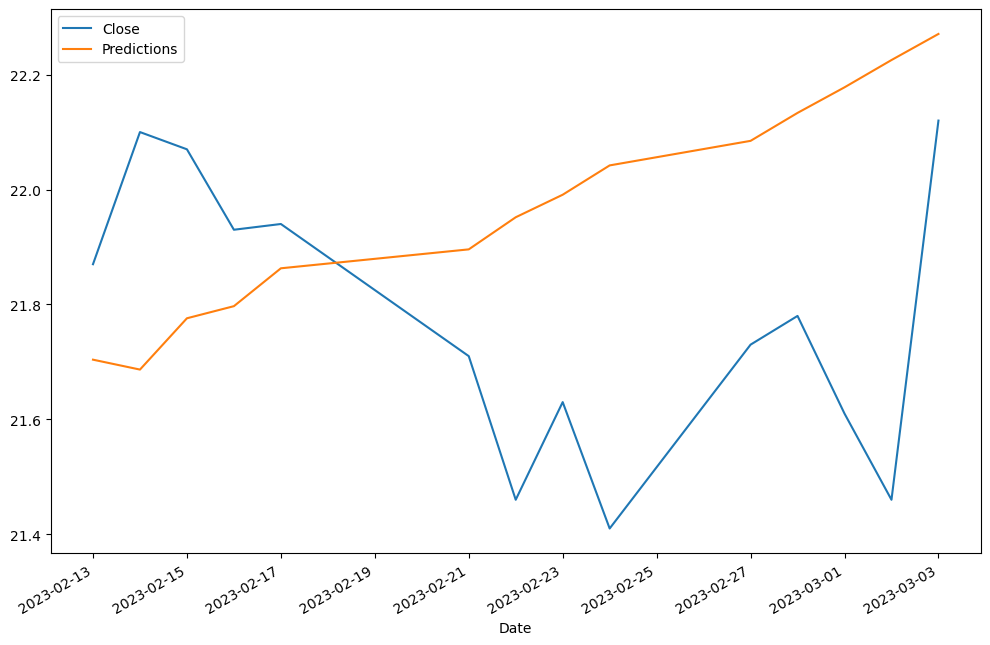

In [38]:
test['Predictions'] = actual_predictions
test.plot(figsize=(12,8));

<AxesSubplot:xlabel='Date'>

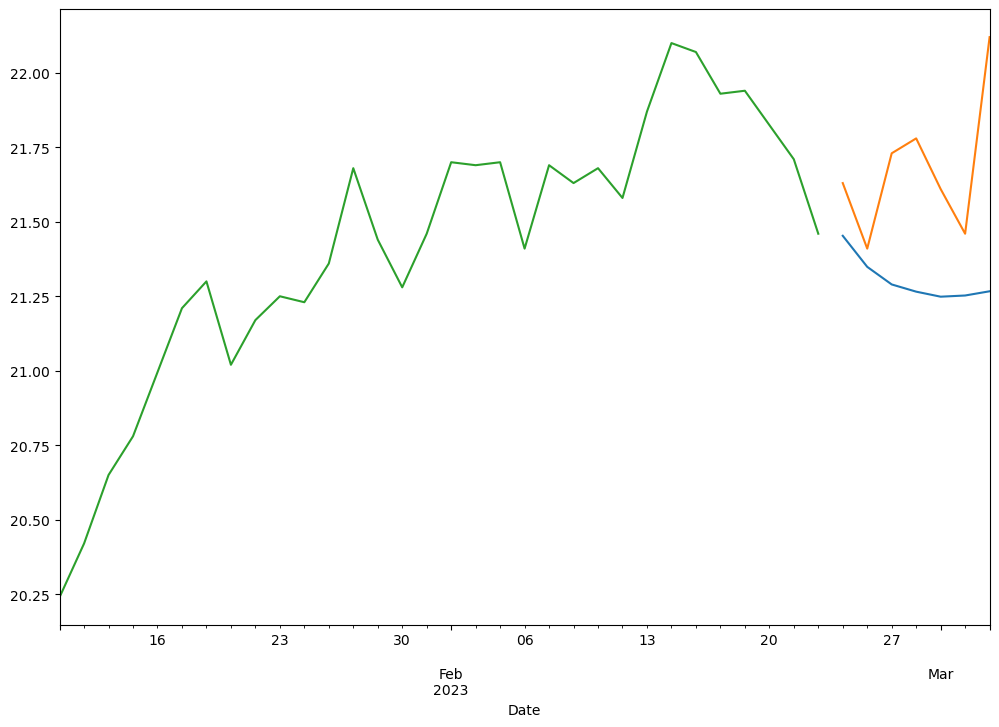

In [73]:
test[-10:].asfreq('B')['Predictions'].plot(figsize=(12,8))
test[-10:].asfreq('B')['Close'].plot()
train[pd.isna(train)==False][-30:]['Close'].plot()